In [2]:
from import_src import import_src
import_src()

Append /home/v_user/tungpth/MLOpsVN/src to sys.path


In [3]:
%cd ../..
%pwd
import os
os.getcwd()

/home/v_user/tungpth/MLOpsVN


'/home/v_user/tungpth/MLOpsVN'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json
from plotly import express as px
from sklearn.preprocessing import LabelEncoder
import mlflow
import time
import threading
import yaml
from tqdm import tqdm
pd.set_option('display.max_columns', 100)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [5]:
from glob import glob

In [6]:
batches = [x for x in glob('data/captured_data/phase-3/prob-2/*.parquet') if '123.parquet' not in x]
batches

['data/captured_data/phase-3/prob-2/bf052bc3-593c-49d7-a39c-44e03220c12e.parquet',
 'data/captured_data/phase-3/prob-2/7696e535-8b5a-4f1e-84a0-0e99cab08596.parquet',
 'data/captured_data/phase-3/prob-2/2ece3edf-894d-465e-b928-610ba34bebb0.parquet',
 'data/captured_data/phase-3/prob-2/2897e539-b83a-4311-80a9-3dee8e4f8024.parquet',
 'data/captured_data/phase-3/prob-2/e50edbfe-298f-4951-a8a2-3c06a95bce47.parquet',
 'data/captured_data/phase-3/prob-2/ff2348d7-5bf9-4093-9d84-f2ddd26fb0b2.parquet',
 'data/captured_data/phase-3/prob-2/42d29a04-65a6-4ce3-a1e9-8c5302b6fa35.parquet',
 'data/captured_data/phase-3/prob-2/d6e1cb1d-4421-496a-8d01-9b68e680e3dd.parquet',
 'data/captured_data/phase-3/prob-2/119e7a1e-2950-4173-becd-d57280f6907e.parquet',
 'data/captured_data/phase-3/prob-2/6d8c3b2c-1756-4f0c-8235-cecb63435d01.parquet',
 'data/captured_data/phase-3/prob-2/5c1fac7a-f863-43af-8962-4870a8df58d0.parquet',
 'data/captured_data/phase-3/prob-2/a05d7189-66d9-4b52-9c50-13cda00b14bc.parquet',
 'da

In [7]:
feature_config = yaml.safe_load(open('data/raw_data/phase-3/prob-2/features_config.json'))
feature_config

{'numeric_columns': ['feature1',
  'feature5',
  'feature6',
  'feature7',
  'feature8',
  'feature9',
  'feature10',
  'feature11',
  'feature12',
  'feature13',
  'feature14',
  'feature15',
  'feature16',
  'feature17',
  'feature18',
  'feature19',
  'feature20',
  'feature21',
  'feature22',
  'feature23',
  'feature24',
  'feature25',
  'feature26',
  'feature27',
  'feature28',
  'feature29',
  'feature30',
  'feature31',
  'feature32',
  'feature33',
  'feature34',
  'feature35',
  'feature36',
  'feature37',
  'feature38',
  'feature39',
  'feature40',
  'feature41'],
 'category_columns': ['feature2', 'feature3', 'feature4'],
 'target_column': 'label',
 'ml_type': 'classification'}

In [9]:
features = feature_config['numeric_columns'] + feature_config['category_columns']
cat_features = feature_config['category_columns']

In [10]:
batches[0]

'data/captured_data/phase-3/prob-2/90f88ef3-2075-4967-91a9-b9380da55ac1.parquet'

In [11]:
single_batch = pd.read_parquet(batches[0])
single_batch

,feature33,feature6,feature11,feature31,feature13,feature15,feature4,feature12,feature24,feature10,feature17,feature27,feature38,feature35,feature1,feature9,feature23,feature30,feature29,feature16,feature5,feature41,feature14,feature32,feature2,feature37,feature18,feature36,feature25,feature7,feature22,feature28,feature21,feature8,feature3,feature34,feature40,feature20,feature39,feature26,feature19
0,1.0,42.0,1.620791e+06,0.0,7.0,0.304872,3,1.500425e+07,0.000540,29.0,0.000000,560.0,0.000000e+00,1.0,0.012236,31.0,6.880025e-04,7.0,0.0,0.285171,40.0,0.0,14.0,3.0,112,0.0,17.069981,0.0,0.000148,2542.0,2.550000e+02,0.0,7.490082e+08,23508.0,0,1.0,5.0,7.337105e+08,5.0,64.0,2.550000e+02
1,2.0,0.0,0.000000e+00,2.0,0.0,60000.696000,4,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000e+00,2.0,0.000000,0.0,0.000000e+00,2.0,0.0,0.000000,1.0,1.0,0.0,2.0,6,0.0,0.000000,0.0,0.000000,46.0,2.988797e-09,0.0,0.000000e+00,0.0,0,2.0,2.0,0.000000e+00,2.0,46.0,0.000000e+00
2,33.0,0.0,1.520000e+08,2.0,0.0,0.003000,4,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000e+00,33.0,0.000003,254.0,0.000000e+00,33.0,0.0,0.000000,2.0,0.0,0.0,33.0,118,0.0,0.000000,0.0,0.000000,114.0,0.000000e+00,0.0,0.000000e+00,0.0,2,16.0,NaN,0.000000e+00,NaN,57.0,0.000000e+00
3,31.0,0.0,5.066666e+07,2.0,0.0,0.009000,4,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000e+00,31.0,0.000009,254.0,2.468914e-09,31.0,0.0,0.000000,2.0,0.0,0.0,31.0,118,0.0,0.000000,0.0,0.000000,114.0,0.000000e+00,0.0,0.000000e+00,0.0,2,17.0,31.0,0.000000e+00,31.0,57.0,3.230670e-09
4,2.0,2.0,5.126213e+05,0.0,0.0,0.009000,1,6.368932e+05,0.000000,29.0,0.000000,82.0,0.000000e+00,2.0,0.001030,31.0,2.468914e-09,4.0,0.0,0.005000,2.0,0.0,0.0,6.0,118,0.0,0.000000,0.0,0.000000,132.0,0.000000e+00,0.0,0.000000e+00,164.0,2,1.0,7.0,0.000000e+00,4.0,66.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,88.0,7.232444e+03,1.0,7.0,51.720964,3,4.954917e+05,0.033754,252.0,2969.623796,1068.0,7.792916e-09,1.0,1.499908,62.0,9.399700e-02,1.0,0.0,16.842644,30.0,0.0,42.0,1.0,112,0.0,1695.785332,0.0,0.060243,1402.0,2.550000e+02,0.0,3.723557e+09,93966.0,7,1.0,1.0,2.971221e+09,1.0,47.0,2.550000e+02
996,16.0,0.0,1.520000e+08,2.0,0.0,0.003000,4,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000e+00,31.0,0.000003,254.0,2.468914e-09,31.0,0.0,0.000000,2.0,0.0,0.0,16.0,118,0.0,0.000000,0.0,0.000000,114.0,2.988797e-09,0.0,0.000000e+00,0.0,2,16.0,31.0,0.000000e+00,17.0,57.0,3.230670e-09
997,1.0,0.0,4.160000e+08,2.0,0.0,0.001000,4,7.190508e-09,0.000000,0.0,0.000000,0.0,0.000000e+00,1.0,0.000001,254.0,2.468914e-09,3.0,0.0,0.000000,2.0,0.0,0.0,1.0,118,0.0,0.000000,0.0,0.000000,104.0,0.000000e+00,0.0,0.000000e+00,0.0,0,1.0,3.0,0.000000e+00,1.0,52.0,0.000000e+00
998,1.0,28.0,7.950301e+05,1.0,36.0,10.682338,3,2.061906e+04,0.036863,252.0,884.561954,79.0,0.000000e+00,1.0,0.822540,62.0,8.116500e-02,1.0,0.0,27.935629,78.0,0.0,8.0,1.0,112,0.0,37.177512,0.0,0.044302,82804.0,2.550000e+02,0.0,1.228205e+09,2198.0,9,1.0,1.0,2.123539e+09,1.0,1062.0,2.550000e+02


In [12]:
single_batch.isnull().sum()/len(single_batch)

feature33    0.016
feature6     0.015
feature11    0.018
feature31    0.011
feature13    0.012
feature15    0.014
feature4     0.000
feature12    0.014
feature24    0.011
feature10    0.012
feature17    0.013
feature27    0.017
feature38    0.012
feature35    0.020
feature1     0.018
feature9     0.016
feature23    0.012
feature30    0.015
feature29    0.011
feature16    0.018
feature5     0.016
feature41    0.019
feature14    0.004
feature32    0.013
feature2     0.000
feature37    0.009
feature18    0.016
feature36    0.010
feature25    0.013
feature7     0.009
feature22    0.015
feature28    0.016
feature21    0.011
feature8     0.017
feature3     0.000
feature34    0.019
feature40    0.022
feature20    0.015
feature39    0.019
feature26    0.011
feature19    0.019
dtype: float64

In [13]:
# single_batch.columns

In [14]:
# for col in single_batch.columns:
#     plt.hist(single_batch[col])
#     plt.title(col)
#     plt.show()

In [15]:
# single_batch[['feature5']]

In [16]:
single_batch.nunique()

feature33     40
feature6      61
feature11    693
feature31      5
feature13     40
feature15    619
feature4       5
feature12    617
feature24    470
feature10      5
feature17    569
feature27    175
feature38      7
feature35     47
feature1     636
feature9       6
feature23    509
feature30     47
feature29     58
feature16    569
feature5      68
feature41      2
feature14     46
feature32     41
feature2       7
feature37      2
feature18    547
feature36      2
feature25    414
feature7     352
feature22      4
feature28      2
feature21    548
feature8     229
feature3      10
feature34     24
feature40     86
feature20    548
feature39     41
feature26    180
feature19      4
dtype: int64

In [17]:
# single_batch['feature2']

In [18]:
from src.model import Model

model = Model('data/model_config/phase-3/prob-2/phase-3_prob-2_lgbm_cv.yaml',
      yaml.safe_load(open('data/predictor_config/phase-3/default_log.yaml')))

2023-08-27 08:48:26,928 - model-config: {'model_name': 'phase-3_prob-2_lgbm_cv', 'model_version': 8, 'phase_id': 'phase-3', 'prob_id': 'prob-2'}
2023-08-27 08:48:26,929 - predictor-config: {'specific_handle': False, 'PREDICT_CONSTANT': False, 'DETECT_DRIFT': True, 'LOG_TIME': True, 'CAPTURE_DATA': False, 'PROCESS_DATA': True, 'USE_ASYNC': False}


# Find feature to discriminate 2 batches

In [19]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [20]:
def train_catboost(train_x, val_x, train_y, val_y, early_stopping_rounds=100, verbose=False):
    train_data = Pool(train_x, train_y, cat_features=cat_features)
    val_data = Pool(val_x, val_y, cat_features=cat_features)

    cb = CatBoostClassifier(learning_rate=0.1, num_boost_round=10000, random_state=42, 
                            loss_function="Logloss", verbose=verbose)

    cb.fit(train_data, eval_set=(val_data), early_stopping_rounds=early_stopping_rounds)
    return cb

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
# accuracy_score()

In [23]:
import random

importance_df_all = pd.DataFrame(columns=['features', 'importances'])

for i in range(20):
    random.seed(i)
    batch_0_path, batch_1_path = random.choices(batches, k=2)
    batch_0 = pd.read_parquet(batch_0_path)
    batch_1 = pd.read_parquet(batch_1_path)
    
    # drift0 = model.detect_drift(batch_0)
    # drift1 = model.detect_drift(batch_1)
    
    # if not (drift0==0 and drift1==0):
    #     continue
    
    # print('Drift', drift0, drift1)
    
    batch_0['label'] = 0
    batch_1['label'] = 1
    
    data = pd.concat([batch_0, batch_1])
    train_x, val_x, train_y, val_y = train_test_split(data[features], data['label'], test_size=0.2)
    
    
    cb = train_catboost(train_x, val_x, train_y, val_y, early_stopping_rounds=100, verbose=False)
    
    print(accuracy_score(val_y, cb.predict(val_x)))
    
    print('=================')
    
    importance_df = pd.DataFrame({'features':cb.feature_names_, 'importances':cb.feature_importances_})
    importance_df_all = pd.concat([importance_df_all, importance_df])
    

0.833116036505867
0.9075342465753424
0.825
0.99
0.9925
0.975
0.995
0.910958904109589
0.785
0.805
0.9825
0.9775
0.99
0.9875
0.988013698630137
0.8955479452054794
0.975
0.8835616438356164
0.8325
0.99


In [24]:
# importance_df = pd.DataFrame({'features':model.feature_names_, 'importances':model.feature_importances_})
# importance_df.sort_values(by='importances', ascending=False)

In [25]:
# model.evals_result_

In [26]:
# importance_df_all = importance_df_all.sort_values(by='importances', ascending=False)
# plt.figure(figsize=(15,10))
# sns.barplot(importance_df_all, x='importances', y='features')
# plt.show()

=> 2 drifted easy to discriminate

#### Detect drift model

In [30]:
dfs = []
drifts = []
groups = []

for i, batch in enumerate(batches):
    group_arr = np.full(shape=len(batch), fill_value=i)
    groups.append(group_arr)
    
    df = pd.read_parquet(batch)
    dfs.append(df)
    
    is_drift = model.detect_drift(df)
    is_drift_arr = np.full(shape=len(df), fill_value=is_drift)
    drifts.append(is_drift_arr)
    

In [31]:
df_all = pd.concat(dfs)
drift_all = np.concatenate(drifts)
group_all = np.concatenate(groups)

In [32]:
df_all = df_all[features]

In [33]:
df_all

,feature1,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature2,feature3,feature4
0,0.012236,40.0,42.0,2542.000000,23508.0,31.0,29.0,1.620791e+06,1.500425e+07,7.0,14.0,0.304872,0.285171,0.000000,17.069981,2.550000e+02,7.337105e+08,7.490082e+08,2.550000e+02,6.880025e-04,0.000540,0.000148,64.000000,560.0,0.0,0.0,7.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,0.0,112,0,3
1,0.000000,1.0,0.0,46.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,60000.696000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.988797e-09,0.000000e+00,0.000000,0.000000,46.000000,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,1.0,6,0,4
2,0.000003,2.0,0.0,114.000000,0.0,254.0,0.0,1.520000e+08,0.000000e+00,0.0,0.0,0.003000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,57.000000,0.0,0.0,0.0,33.0,2.0,33.0,33.0,16.0,33.0,0.0,0.0,0.0,NaN,NaN,0.0,118,2,4
3,0.000009,2.0,0.0,114.000000,0.0,254.0,0.0,5.066666e+07,0.000000e+00,0.0,0.0,0.009000,0.000000,0.000000,0.000000,3.230670e-09,0.000000e+00,0.000000e+00,0.000000e+00,2.468914e-09,0.000000,0.000000,57.000000,0.0,0.0,0.0,31.0,2.0,31.0,31.0,17.0,31.0,0.0,0.0,0.0,31.0,31.0,0.0,118,2,4
4,0.001030,2.0,2.0,132.000000,164.0,31.0,29.0,5.126213e+05,6.368932e+05,0.0,0.0,0.009000,0.005000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.468914e-09,0.000000,0.000000,66.000000,82.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,0.0,0.0,0.0,4.0,7.0,0.0,118,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.443649,10.0,6.0,814.000000,268.0,254.0,252.0,1.321766e+04,4.039229e+03,2.0,1.0,45.400000,NaN,2416.275874,89.298797,NaN,3.594850e+09,1.074244e+09,2.550000e+02,1.616990e-01,0.126053,0.035646,81.000001,45.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,112,0,3
996,0.000010,2.0,0.0,114.000001,0.0,254.0,0.0,4.560000e+07,0.000000e+00,0.0,0.0,0.010000,NaN,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,57.000000,0.0,0.0,0.0,47.0,2.0,43.0,43.0,25.0,47.0,0.0,0.0,0.0,43.0,NaN,0.0,118,2,4
997,3.024670,24.0,22.0,1248.000001,1656.0,NaN,252.0,3.163320e+03,4.181613e+03,7.0,9.0,131.507390,141.812101,7108.568249,8703.427471,2.550000e+02,9.254602e+07,1.175078e+09,2.550000e+02,9.887100e-02,0.045997,0.052874,52.000000,75.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,NaN,112,3,3
998,0.731504,10.0,8.0,752.000000,2656.0,62.0,252.0,7.403924e+03,2.541613e+04,2.0,2.0,81.278222,92.576000,4537.251353,148.737516,2.550000e+02,1.998249e+09,2.385024e+09,2.550000e+02,1.487110e-01,0.082782,0.065929,75.000000,332.0,NaN,912.0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,2.0,1.0,0.0,112,5,3


In [34]:
from sklearn.model_selection import GroupShuffleSplit

In [105]:
train_inds, val_inds = next(GroupShuffleSplit(test_size=0.2, random_state=42).split(df_all, groups=group_all)) 

# train_x, val_x, train_y, val_y = train_test_split(df_all, drift_all, test_size=0.2)
train_x = df_all.iloc[train_inds]
val_x = df_all.iloc[val_inds]
train_y = drift_all[train_inds]
val_y = drift_all[val_inds]

# train_data = Pool(train_x, train_y, cat_features=cat_features)
# val_data = Pool(val_x, val_y, cat_features=cat_features)

# detect_drift_model = CatBoostClassifier(iterations=10000, random_state=42, loss_function="Logloss", verbose=300)

# detect_drift_model.fit(train_data, eval_set=(val_data), early_stopping_rounds=300)

detect_drift_model = train_catboost(train_x, val_x, train_y, val_y, early_stopping_rounds=300, verbose=300)

print(accuracy_score(val_y, detect_drift_model.predict(val_x)))


Learning rate set to 0.041943
0:	learn: 0.6171151	test: 0.6152961	best: 0.6152961 (0)	total: 48.7ms	remaining: 8m 6s
300:	learn: 0.0444769	test: 0.0501089	best: 0.0501089 (300)	total: 15.7s	remaining: 8m 26s
600:	learn: 0.0286185	test: 0.0342227	best: 0.0342227 (600)	total: 31.8s	remaining: 8m 16s
900:	learn: 0.0198922	test: 0.0258172	best: 0.0258172 (900)	total: 48.1s	remaining: 8m 5s
1200:	learn: 0.0150628	test: 0.0216691	best: 0.0216691 (1200)	total: 1m 4s	remaining: 7m 50s
1500:	learn: 0.0120512	test: 0.0184031	best: 0.0184031 (1500)	total: 1m 20s	remaining: 7m 34s
1800:	learn: 0.0104635	test: 0.0170232	best: 0.0170210 (1799)	total: 1m 35s	remaining: 7m 14s
2100:	learn: 0.0089605	test: 0.0153673	best: 0.0153673 (2100)	total: 1m 51s	remaining: 6m 59s
2400:	learn: 0.0080746	test: 0.0142840	best: 0.0142840 (2400)	total: 2m 6s	remaining: 6m 39s
2700:	learn: 0.0073512	test: 0.0135472	best: 0.0135472 (2699)	total: 2m 20s	remaining: 6m 20s
3000:	learn: 0.0067196	test: 0.0128056	best: 0.01

In [115]:
train_x = pd.read_parquet('data/train_data/phase-3/prob-2/train_x.parquet')
val_x = pd.read_parquet('data/train_data/phase-3/prob-2/test_x.parquet')

In [116]:
# train_y = pd.read_parquet('data/train_data/phase-3/prob-2/train_y.parquet')
# train_y

In [117]:
train_x = Pool(train_x, cat_features=cat_features)
train_x

In [118]:
train_drift = detect_drift_model.predict(train_x)
train_drift

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
(train_drift==1).sum()

172

In [120]:
val_x = Pool(val_x, cat_features=cat_features)
val_x
val_drift = detect_drift_model.predict(val_x)
val_drift
(val_drift==1).sum()

51

In [121]:
np.where(train_drift==1)

(array([   31,   365,   450,   518,   788,   941,  1062,  1822,  2040,
         2238,  2240,  2336,  2638,  2880,  2912,  3437,  3788,  4489,
         5477,  5940,  6922,  7027,  7376,  7468,  7522,  7529,  8016,
         8578,  9177, 10053, 11183, 11265, 11375, 11510, 12028, 13062,
        13157, 13185, 13276, 13983, 14273, 14399, 14903, 15125, 15552,
        16114, 16245, 16254, 16526, 17829, 18484, 18810, 19491, 19874,
        20120, 21620, 21716, 21723, 21996, 22531, 23905, 24234, 24422,
        25051, 25207, 25490, 25600, 26540, 26653, 26752, 27262, 27545,
        27876, 28441, 29383, 30400, 30626, 30631, 30812, 31266, 31289,
        31554, 31801, 32155, 32875, 33424, 34171, 34788, 34930, 35971,
        36011, 36915, 36949, 37233, 37311, 37346, 37644, 37694, 37831,
        37913, 38005, 38510, 39304, 39467, 39494, 42807, 43665, 43798,
        43877, 43930, 44066, 44134, 45155, 45334, 46247, 46468, 46831,
        46863, 47363, 47392, 47531, 47802, 48735, 48805, 48869, 49097,
      

In [122]:
np.where(val_drift==1)

(array([  986,  1180,  1290,  1407,  1931,  2045,  2515,  2706,  3584,
         3628,  3682,  4307,  4579,  4805,  4941,  5967,  6476,  6481,
         6729,  7006,  7297,  7631,  7794,  8128,  8774,  9399,  9686,
         9702, 10106, 10400, 10786, 10934, 11390, 12455, 12472, 13276,
        13365, 13370, 13683, 14261, 14586, 15118, 15393, 16114, 16279,
        17150, 17167, 17654, 17884, 18213, 18410]),)

In [123]:
train_x

# Train model label drift

In [35]:
class Graph:
 
    # init function to declare class variables
    def __init__(self, V):
        self.V = V
        self.adj = [[] for i in range(V)]
 
    def DFSUtil(self, temp, v, visited):
 
        # Mark the current vertex as visited
        visited[v] = True
 
        # Store the vertex to list
        temp.append(v)
 
        # Repeat for all vertices adjacent
        # to this vertex v
        for i in self.adj[v]:
            if visited[i] == False:
 
                # Update the list
                temp = self.DFSUtil(temp, i, visited)
        return temp
 
    # method to add an undirected edge
    def addEdge(self, v, w):
        self.adj[v].append(w)
        self.adj[w].append(v)
 
    # Method to retrieve connected components
    # in an undirected graph
    def connectedComponents(self):
        visited = []
        cc = []
        for i in range(self.V):
            visited.append(False)
        for v in range(self.V):
            if visited[v] == False:
                temp = []
                cc.append(self.DFSUtil(temp, v, visited))
        return cc

In [36]:
def removed(ls, remove_item):
    ls_res = ls.copy()
    ls_res.remove(remove_item)
    return ls_res

In [37]:
sample_size = 100

all_ref_dists = random.sample(batches, k=min(sample_size, len(batches)))
all_ref_dists_idx = [i for i in range(len(all_ref_dists))]

# print(all_ref_dists_idx)

compare_dists_idx = [random.sample(removed(all_ref_dists_idx, idx), k=5) for idx in all_ref_dists_idx]
compare_dists_idx

[[40, 87, 98, 6, 10],
 [27, 40, 88, 97, 54],
 [13, 60, 9, 65, 58],
 [85, 2, 23, 56, 84],
 [36, 10, 11, 17, 22],
 [56, 37, 60, 15, 26],
 [80, 61, 88, 9, 55],
 [84, 82, 20, 1, 50],
 [80, 84, 38, 82, 5],
 [73, 70, 76, 46, 33],
 [27, 34, 66, 41, 7],
 [3, 36, 84, 27, 8],
 [26, 38, 68, 60, 97],
 [65, 18, 42, 66, 34],
 [72, 92, 93, 95, 40],
 [83, 96, 88, 68, 37],
 [83, 65, 73, 55, 62],
 [7, 29, 20, 5, 59],
 [14, 66, 76, 12, 34],
 [92, 60, 90, 49, 88],
 [42, 43, 48, 24, 57],
 [43, 93, 12, 82, 86],
 [85, 68, 58, 53, 80],
 [5, 47, 11, 41, 56],
 [47, 59, 76, 94, 5],
 [38, 34, 36, 11, 29],
 [51, 4, 21, 61, 85],
 [92, 71, 13, 91, 77],
 [66, 11, 4, 76, 56],
 [5, 92, 88, 17, 79],
 [42, 32, 70, 94, 4],
 [36, 24, 18, 32, 38],
 [15, 76, 57, 16, 9],
 [89, 58, 40, 71, 52],
 [75, 28, 46, 95, 13],
 [87, 30, 33, 17, 45],
 [59, 72, 28, 58, 39],
 [7, 75, 57, 15, 24],
 [79, 8, 64, 16, 50],
 [67, 35, 63, 45, 58],
 [6, 68, 55, 3, 74],
 [28, 85, 39, 72, 31],
 [13, 52, 54, 82, 17],
 [89, 69, 29, 19, 59],
 [23, 92, 

In [73]:
# all_ref_dists_idx

In [38]:
G = Graph(len(all_ref_dists))

for ref_dist_idx, compare_dist_idx_set in tqdm(zip(all_ref_dists_idx, compare_dists_idx), total=len(all_ref_dists)):
    # print(ref_dist_idx)
    for compare_dist_idx in compare_dist_idx_set:
        ref_dist = all_ref_dists[ref_dist_idx]
        compare_dist = all_ref_dists[compare_dist_idx]
        
        batch_0 = pd.read_parquet(ref_dist)
        batch_1 = pd.read_parquet(compare_dist)
        
        batch_0['label'] = 0
        batch_1['label'] = 1
        
        data = pd.concat([batch_0, batch_1])
        train_x, val_x, train_y, val_y = train_test_split(data[features], data['label'], test_size=0.3)
        
        cb = train_catboost(train_x, val_x, train_y, val_y, early_stopping_rounds=100, verbose=False)
        
        acc = accuracy_score(val_y, cb.predict(val_x))
        
        if acc<0.95:
            G.addEdge(ref_dist_idx, compare_dist_idx)


100%|██████████| 100/100 [08:11<00:00,  4.91s/it]


In [39]:
# len(all_ref_dists)

In [42]:
list_connected_components = G.connectedComponents()
list_connected_components

[[0,
  40,
  1,
  88,
  6,
  80,
  8,
  84,
  3,
  85,
  26,
  5,
  60,
  2,
  9,
  73,
  16,
  83,
  67,
  39,
  35,
  87,
  46,
  74,
  61,
  21,
  43,
  20,
  7,
  82,
  42,
  30,
  32,
  76,
  18,
  66,
  10,
  4,
  11,
  23,
  47,
  92,
  29,
  17,
  59,
  54,
  69,
  62,
  44,
  78,
  68,
  12,
  38,
  50,
  97,
  45,
  57,
  75,
  58,
  33,
  89,
  71,
  99,
  41,
  28,
  72,
  48,
  95,
  96,
  93,
  91,
  94,
  98,
  81,
  70,
  86,
  53,
  65,
  49,
  77],
 [13, 34, 25, 36, 31, 24, 37, 15, 56, 19, 90, 79, 51, 63, 55, 27],
 [14],
 [22, 64],
 [52]]

In [46]:
big_dist_idx = max(list_connected_components, key=len)
small_dist_idx = [i for i in all_ref_dists_idx if i not in big_dist_idx]

big_dist_idx, small_dist_idx

([0,
  40,
  1,
  88,
  6,
  80,
  8,
  84,
  3,
  85,
  26,
  5,
  60,
  2,
  9,
  73,
  16,
  83,
  67,
  39,
  35,
  87,
  46,
  74,
  61,
  21,
  43,
  20,
  7,
  82,
  42,
  30,
  32,
  76,
  18,
  66,
  10,
  4,
  11,
  23,
  47,
  92,
  29,
  17,
  59,
  54,
  69,
  62,
  44,
  78,
  68,
  12,
  38,
  50,
  97,
  45,
  57,
  75,
  58,
  33,
  89,
  71,
  99,
  41,
  28,
  72,
  48,
  95,
  96,
  93,
  91,
  94,
  98,
  81,
  70,
  86,
  53,
  65,
  49,
  77],
 [13,
  14,
  15,
  19,
  22,
  24,
  25,
  27,
  31,
  34,
  36,
  37,
  51,
  52,
  55,
  56,
  63,
  64,
  79,
  90])

In [49]:
big_dist = [all_ref_dists[i] for i in big_dist_idx]
small_dist = [all_ref_dists[i] for i in small_dist_idx]

In [59]:
# np.savetxt('src/notebooks/seperate_distribution_checkpoint/big_dist.txt', np.array(big_dist))
# np.savetxt('src/notebooks/seperate_distribution_checkpoint/small_dist.txt', np.array(small_dist))

with open('src/notebooks/seperate_distribution_checkpoint/big_dist.txt', 'w') as f:
    for dist in big_dist:
        f.write(f"{dist}\n")
    
with open('src/notebooks/seperate_distribution_checkpoint/small_dist.txt', 'w') as f:
    for dist in small_dist:
        f.write(f"{dist}\n")

# Concept drift

In [60]:
train_x = pd.read_parquet('data/train_data/phase-3/prob-2/train_x.parquet')
train_y = pd.read_parquet('data/train_data/phase-3/prob-2/train_y.parquet')
val_x = pd.read_parquet('data/train_data/phase-3/prob-2/test_x.parquet')
val_y = pd.read_parquet('data/train_data/phase-3/prob-2/test_y.parquet')

In [61]:
train_x['label'] = train_y
train_x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label
0,0.000005,125,0,4,2.0,0.0,200.0,0.0,254.0,0.0,1.600000e+08,0.000000e+00,0.0,0.0,0.005000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,4.0,0.0,0.0,0.0,19.0,3.0,0.0,Malware
1,0.500038,112,0,3,10.0,8.0,1612.0,354.0,254.0,252.0,2.321423e+04,4.959623e+03,2.0,1.0,52.250778,65.232570,3475.644626,106.801250,255.0,4.173341e+09,2.351484e+09,255.0,0.074892,0.043402,0.031490,161.0,44.0,0.0,0.0,10.0,1.0,3.0,3.0,1.0,10.0,0.0,0.0,0.0,3.0,10.0,0.0,Denial of Service
2,0.000009,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,8.888889e+07,0.000000e+00,0.0,0.0,0.009000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0,3.0,0.0,0.0,0.0,3.0,2.0,0.0,Exploits
3,0.001017,118,2,1,2.0,2.0,130.0,162.0,31.0,29.0,5.113078e+05,6.371682e+05,0.0,0.0,0.002000,0.008000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,65.0,81.0,0.0,0.0,5.0,0.0,5.0,2.0,1.0,2.0,0.0,0.0,0.0,6.0,2.0,0.0,Normal
4,0.188122,112,0,3,22.0,24.0,2054.0,2478.0,31.0,29.0,8.339269e+04,1.009983e+05,6.0,6.0,8.921048,8.156695,0.000000,575.630698,255.0,2.212961e+09,6.360979e+07,255.0,0.000650,0.000514,0.000136,93.0,103.0,0.0,0.0,6.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,7.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74204,0.404527,112,0,3,204.0,396.0,11826.0,495632.0,31.0,29.0,2.327459e+05,9.776969e+06,19.0,178.0,1.990892,1.022894,130.287673,69.534381,255.0,4.162284e+09,2.020623e+09,255.0,0.001171,0.000479,0.000692,58.0,1252.0,0.0,0.0,9.0,0.0,10.0,7.0,1.0,9.0,0.0,0.0,0.0,9.0,9.0,0.0,Normal
74205,1.579113,112,0,3,16.0,12.0,922.0,704.0,254.0,252.0,4.382207e+03,3.272723e+03,5.0,4.0,99.928530,135.655266,5009.633002,156.375953,255.0,8.996028e+08,3.182606e+09,255.0,0.175852,0.086897,0.088955,58.0,59.0,0.0,0.0,6.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,Normal
74206,0.000024,118,2,4,2.0,0.0,114.0,0.0,254.0,0.0,1.900000e+07,0.000000e+00,0.0,0.0,0.024000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,57.0,0.0,0.0,0.0,16.0,2.0,19.0,16.0,16.0,16.0,0.0,0.0,0.0,16.0,16.0,0.0,Other
74207,0.000009,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,8.888889e+07,0.000000e+00,0.0,0.0,0.009000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,7.0,2.0,4.0,4.0,4.0,12.0,0.0,0.0,0.0,4.0,7.0,0.0,Exploits


In [62]:
X_train = train_x
target_col = 'label'

feature_group = X_train.columns.tolist()
dup_ = X_train.groupby(feature_group).agg(count_per_label=(target_col, "count")).reset_index()
feature_group.remove('label')

count_record = X_train.groupby(feature_group).agg(count_distinct_label=(target_col, "nunique")).reset_index()
# dup_['order'] = dup_.sort_values(['count_per_label', target_col], ascending=[False, False]).groupby(feature_group).cumcount()
# dup_['count_per_label_lag'] = dup_.sort_values(['order']).groupby(feature_group)['count_per_label'].shift(-1)
dup_ = dup_.merge(count_record, how='inner', on=feature_group)
total_dup = dup_[dup_['count_distinct_label'] != 1].reset_index(drop=True)

total_dup

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label,count_per_label,count_distinct_label
0,0.000000,118,0,4,1.0,0.0,24.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,Denial of Service,1,2
1,0.000000,118,0,4,1.0,0.0,24.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,Exploits,1,2
2,0.000000,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,7.0,2.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,5.0,7.0,0.0,Denial of Service,1,3
3,0.000000,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,7.0,2.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,5.0,7.0,0.0,Exploits,5,3
4,0.000000,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,7.0,2.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,5.0,7.0,0.0,Information Gathering,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,59.810604,78,0,4,130.0,0.0,35360.0,0.0,254.0,0.0,4693.214355,0.0,0.0,0.0,463.647906,0.0,553.786375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,Malware,1,4
4806,59.810604,78,0,4,130.0,0.0,35360.0,0.0,254.0,0.0,4693.214355,0.0,0.0,0.0,463.647906,0.0,553.786375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,Other,1,4
4807,59.879597,78,0,4,128.0,0.0,34816.0,0.0,254.0,0.0,4615.127930,0.0,0.0,0.0,471.492656,0.0,562.680187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,Denial of Service,3,3
4808,59.879597,78,0,4,128.0,0.0,34816.0,0.0,254.0,0.0,4615.127930,0.0,0.0,0.0,471.492656,0.0,562.680187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,Exploits,3,3


In [63]:
X = pd.concat([train_x, val_x])
y = pd.concat([train_y, val_y])

In [64]:
# for i in tqdm(range(100)):
#     # random.seed(i)
#     batch_0_path, batch_1_path = random.choices(batches, k=2)
#     batch_0 = pd.read_parquet(batch_0_path)
#     batch_1 = pd.read_parquet(batch_1_path)
    
#     drift0 = model.detect_drift(batch_0)
#     drift1 = model.detect_drift(batch_1)
    
#     if not (drift0==0 and drift1==0):
#         continue
#     else:
#         break

In [65]:
# def train_catboost(train_x, val_x, train_y, val_y):
#     train_data = Pool(train_x, train_y, cat_features=cat_features)
#     val_data = Pool(val_x, val_y, cat_features=cat_features)

#     cb = CatBoostClassifier(random_state=42, loss_function="Logloss", verbose=100)

#     cb.fit(train_data, eval_set=(val_data), early_stopping_rounds=100)
#     return cb

In [68]:
pd.read_parquet(batch_0_path)

,feature2,feature20,feature32,feature34,feature37,feature1,feature22,feature6,feature31,feature7,feature4,feature12,feature16,feature39,feature3,feature28,feature10,feature27,feature26,feature18,feature14,feature30,feature19,feature40,feature29,feature38,feature23,feature13,feature11,feature24,feature5,feature17,feature36,feature25,feature35,feature15,feature9,feature41,feature8,feature33,feature21
0,118,0.000000e+00,1.0,1.0,0.0,0.000001,0.000000e+00,0.0,2.000000e+00,168.0,4,0.000000e+00,0.000000,1.0,0,0.0,0.0,0.0,84.0,0.000000,0.0,2.0,0.0,1.0,7.697538e-09,0.0,0.000000,0.0,6.720000e+08,0.000000,2.0,0.000000e+00,0.0,7.596625e-09,1.0,0.001000,254.0,0.000000e+00,0.0,1.0,0.000000e+00
1,118,0.000000e+00,5.0,3.0,0.0,0.000011,0.000000e+00,0.0,2.000000e+00,114.0,4,0.000000e+00,0.000000,6.0,2,0.0,0.0,0.0,57.0,0.000000,0.0,12.0,0.0,12.0,0.000000e+00,0.0,0.000000,0.0,4.145454e+07,0.000000,2.0,4.853475e-09,0.0,7.596625e-09,5.0,0.011000,254.0,0.000000e+00,0.0,5.0,0.000000e+00
2,112,3.367047e+09,1.0,1.0,0.0,0.084981,2.550000e+02,74.0,1.010704e-09,4222.0,3,5.950036e+06,1.155521,2.0,0,0.0,29.0,866.0,59.0,70.758638,30.0,2.0,255.0,6.0,0.000000e+00,0.0,0.000745,7.0,3.919935e+05,0.000618,72.0,7.230904e+01,0.0,1.270000e-04,5.0,1.192437,31.0,7.860238e-09,64070.0,1.0,1.217786e+09
3,118,0.000000e+00,2.0,2.0,0.0,0.000006,0.000000e+00,0.0,2.000000e+00,104.0,4,0.000000e+00,0.000000,2.0,0,0.0,0.0,0.0,52.0,0.000000,0.0,2.0,0.0,2.0,7.697538e-09,0.0,0.000000,0.0,6.933333e+07,0.000000,2.0,0.000000e+00,0.0,0.000000e+00,2.0,0.006000,254.0,0.000000e+00,0.0,2.0,0.000000e+00
4,112,1.944672e+09,1.0,1.0,0.0,1.220700,2.550000e+02,12.0,1.000000e+00,63859.0,3,3.165397e+03,105.003094,2.0,0,0.0,252.0,44.0,1183.0,148.375391,1.0,4.0,255.0,3.0,0.000000e+00,0.0,0.132507,24.0,4.107610e+05,0.065665,54.0,2.220272e+03,0.0,6.684200e-02,3.0,22.021020,254.0,0.000000e+00,526.0,1.0,2.095383e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,112,3.594850e+09,1.0,1.0,0.0,0.443649,2.550000e+02,6.0,1.000000e+00,814.0,3,4.039229e+03,NaN,1.0,0,0.0,252.0,45.0,81.0,89.298797,1.0,1.0,NaN,1.0,0.000000e+00,0.0,0.161699,2.0,1.321766e+04,0.126053,10.0,2.416276e+03,0.0,3.564600e-02,1.0,45.400000,254.0,7.860238e-09,268.0,1.0,1.074244e+09
996,118,0.000000e+00,43.0,25.0,0.0,0.000010,1.292983e-09,0.0,2.000000e+00,114.0,4,0.000000e+00,NaN,43.0,2,0.0,0.0,0.0,57.0,0.000000,0.0,47.0,0.0,NaN,0.000000e+00,0.0,0.000000,0.0,4.560000e+07,0.000000,2.0,4.853475e-09,0.0,0.000000e+00,47.0,0.010000,254.0,0.000000e+00,0.0,43.0,0.000000e+00
997,112,9.254602e+07,2.0,1.0,1.0,3.024670,2.550000e+02,22.0,1.000000e+00,1248.0,3,4.181613e+03,141.812101,2.0,3,0.0,252.0,75.0,52.0,8703.427471,9.0,1.0,255.0,1.0,7.697538e-09,0.0,0.098871,7.0,3.163320e+03,0.045997,24.0,7.108568e+03,1.0,5.287401e-02,2.0,131.507390,NaN,NaN,1656.0,1.0,1.175078e+09
998,112,1.998249e+09,1.0,NaN,0.0,0.731504,2.550000e+02,8.0,1.000000e+00,752.0,3,2.541613e+04,92.576000,2.0,5,NaN,252.0,332.0,75.0,148.737516,2.0,1.0,255.0,1.0,9.120000e+02,1.0,0.148711,2.0,7.403924e+03,0.082782,10.0,4.537251e+03,0.0,6.592901e-02,1.0,81.278222,62.0,0.000000e+00,2656.0,1.0,2.385024e+09


In [70]:
# Pool(X, cat_features=cat_features)
X

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label,mark_distribution
0,0.000005,125,0,4,2.0,0.0,200.0,0.0,254.0,0.0,1.600000e+08,0.000000,0.0,0.0,0.005000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,4.0,0.0,0.0,0.0,19.0,3.0,0.0,Malware,0
1,0.500038,112,0,3,10.0,8.0,1612.0,354.0,254.0,252.0,2.321423e+04,4959.622559,2.0,1.0,52.250778,65.232570,3475.644626,106.801250,255.0,4.173341e+09,2.351484e+09,255.0,0.074892,0.043402,0.031490,161.0,44.0,0.0,0.0,10.0,1.0,3.0,3.0,1.0,10.0,0.0,0.0,0.0,3.0,10.0,0.0,Denial of Service,0
2,0.000009,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,8.888889e+07,0.000000,0.0,0.0,0.009000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0,3.0,0.0,0.0,0.0,3.0,2.0,0.0,Exploits,0
3,0.001017,118,2,1,2.0,2.0,130.0,162.0,31.0,29.0,5.113078e+05,637168.187500,0.0,0.0,0.002000,0.008000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,65.0,81.0,0.0,0.0,5.0,0.0,5.0,2.0,1.0,2.0,0.0,0.0,0.0,6.0,2.0,0.0,Normal,0
4,0.188122,112,0,3,22.0,24.0,2054.0,2478.0,31.0,29.0,8.339269e+04,100998.289100,6.0,6.0,8.921048,8.156695,0.000000,575.630698,255.0,2.212961e+09,6.360979e+07,255.0,0.000650,0.000514,0.000136,93.0,103.0,0.0,0.0,6.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,7.0,0.0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,0.000005,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,1.600000e+08,0.000000,0.0,0.0,0.005000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,7.0,2.0,5.0,4.0,4.0,10.0,0.0,0.0,0.0,6.0,7.0,0.0,NaN,0
18549,0.000008,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,1.000000e+08,0.000000,0.0,0.0,0.008000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,5.0,2.0,3.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,5.0,0.0,NaN,0
18550,0.000010,118,0,4,2.0,0.0,1064.0,0.0,254.0,0.0,4.256000e+08,0.000000,0.0,0.0,0.010000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,532.0,0.0,0.0,0.0,3.0,2.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,NaN,0
18551,0.000013,118,0,4,2.0,0.0,1034.0,0.0,254.0,0.0,3.181539e+08,0.000000,0.0,0.0,0.013000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,517.0,0.0,0.0,0.0,34.0,2.0,4.0,4.0,1.0,4.0,0.0,0.0,0.0,4.0,34.0,0.0,NaN,0


In [ ]:
import random

# importance_df_all = pd.DataFrame(columns=['features', 'importances'])

# for i in tqdm(range(100)):
#     random.seed(i)
#     batch_0_path, batch_1_path = random.choices(batches, k=2)
#     batch_0 = pd.read_parquet(batch_0_path)
#     batch_1 = pd.read_parquet(batch_1_path)
    
#     drift0 = model.detect_drift(batch_0)
#     drift1 = model.detect_drift(batch_1)
    
#     if not (drift0==0 and drift1==0):
#         continue
    
#     print('Drift', drift0, drift1)
    
    # batch_0['label'] = 0
    # batch_1['label'] = 1

for i in range(20):
    batch_0_path = random.choices(batches, k=1)

    batch_0 = pd.read_parquet(batch_0_path)
    
    batch_0['mark_distribution'] = 1
    X['mark_distribution'] = 0

    data = pd.concat([batch_0, X])
    train_x, val_x, train_y, val_y = train_test_split(data[features], data['mark_distribution'], test_size=0.2)

    # print(len(train_x))
    # print(len(train_y))

    cb = train_catboost(train_x, val_x, train_y, val_y)

    prob_train = cb.predict_proba(Pool(X[features], cat_features=cat_features))[:,0]

    print(f"Num overlap {len(prob_train[prob_train<0.98])}")
    
    if len(prob_train[prob_train<0.98]) == 0:
        continue

    data = pd.concat([batch_0, X[prob_train<0.98]])
    train_x, val_x, train_y, val_y = train_test_split(data[features], data['mark_distribution'], test_size=0.2)


    cb = train_catboost(train_x, val_x, train_y, val_y)

    print(accuracy_score(val_y, cb.predict(val_x)))


# print(accuracy_score(val_y, cb.predict(val_x)))

# print('=================')

# importance_df = pd.DataFrame({'features':cb.feature_names_, 'importances':cb.feature_importances_})
# importance_df_all = pd.concat([importance_df_all, importance_df])
    

In [73]:
X

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label,mark_distribution
0,0.000005,125,0,4,2.0,0.0,200.0,0.0,254.0,0.0,1.600000e+08,0.000000,0.0,0.0,0.005000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,4.0,0.0,0.0,0.0,19.0,3.0,0.0,Malware,0
1,0.500038,112,0,3,10.0,8.0,1612.0,354.0,254.0,252.0,2.321423e+04,4959.622559,2.0,1.0,52.250778,65.232570,3475.644626,106.801250,255.0,4.173341e+09,2.351484e+09,255.0,0.074892,0.043402,0.031490,161.0,44.0,0.0,0.0,10.0,1.0,3.0,3.0,1.0,10.0,0.0,0.0,0.0,3.0,10.0,0.0,Denial of Service,0
2,0.000009,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,8.888889e+07,0.000000,0.0,0.0,0.009000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0,3.0,0.0,0.0,0.0,3.0,2.0,0.0,Exploits,0
3,0.001017,118,2,1,2.0,2.0,130.0,162.0,31.0,29.0,5.113078e+05,637168.187500,0.0,0.0,0.002000,0.008000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,65.0,81.0,0.0,0.0,5.0,0.0,5.0,2.0,1.0,2.0,0.0,0.0,0.0,6.0,2.0,0.0,Normal,0
4,0.188122,112,0,3,22.0,24.0,2054.0,2478.0,31.0,29.0,8.339269e+04,100998.289100,6.0,6.0,8.921048,8.156695,0.000000,575.630698,255.0,2.212961e+09,6.360979e+07,255.0,0.000650,0.000514,0.000136,93.0,103.0,0.0,0.0,6.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,7.0,0.0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,0.000005,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,1.600000e+08,0.000000,0.0,0.0,0.005000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,7.0,2.0,5.0,4.0,4.0,10.0,0.0,0.0,0.0,6.0,7.0,0.0,NaN,0
18549,0.000008,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,1.000000e+08,0.000000,0.0,0.0,0.008000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,5.0,2.0,3.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,5.0,0.0,NaN,0
18550,0.000010,118,0,4,2.0,0.0,1064.0,0.0,254.0,0.0,4.256000e+08,0.000000,0.0,0.0,0.010000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,532.0,0.0,0.0,0.0,3.0,2.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,NaN,0
18551,0.000013,118,0,4,2.0,0.0,1034.0,0.0,254.0,0.0,3.181539e+08,0.000000,0.0,0.0,0.013000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,517.0,0.0,0.0,0.0,34.0,2.0,4.0,4.0,1.0,4.0,0.0,0.0,0.0,4.0,34.0,0.0,NaN,0


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        4.0000e+00, 6.0000e+00, 7.0000e+00, 4.1000e+01, 9.2702e+04]),
 array([0.75725185, 0.78142006, 0.80558827, 0.82975649, 0.8539247 ,
        0.87809291, 0.90226112, 0.92642934, 0.95059755, 0.97476576,
        0.99893398]),
 <BarContainer object of 10 artists>)

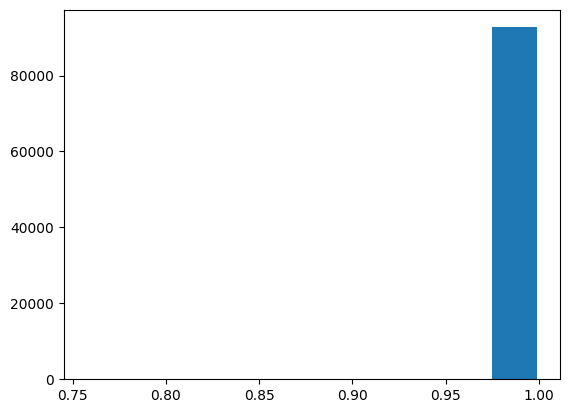

In [219]:
prob_train = cb.predict_proba(Pool(X, cat_features=cat_features))[:,0]
plt.hist(prob_train)

In [220]:
len(prob_train[prob_train<0.98])

93

In [221]:
data = pd.concat([batch_0, X[prob_train<0.98]])
train_x, val_x, train_y, val_y = train_test_split(data[features], data['mark_distribution'], test_size=0.2)


cb = train_catboost(train_x, val_x, train_y, val_y)

print(accuracy_score(val_y, cb.predict(val_x)))

print('=================')

importance_df = pd.DataFrame({'features':cb.feature_names_, 'importances':cb.feature_importances_})
importance_df_all = pd.concat([importance_df_all, importance_df])

Learning rate set to 0.030652
0:	learn: 0.6255342	test: 0.6266774	best: 0.6266774 (0)	total: 3.72ms	remaining: 3.71s
100:	learn: 0.0405013	test: 0.0863323	best: 0.0863041 (98)	total: 317ms	remaining: 2.82s
200:	learn: 0.0216676	test: 0.0817810	best: 0.0813178 (179)	total: 621ms	remaining: 2.47s
300:	learn: 0.0129147	test: 0.0806054	best: 0.0797992 (248)	total: 928ms	remaining: 2.15s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.07979916753
bestIteration = 248

Shrink model to first 249 iterations.
0.9817351598173516


(array([ 2.,  1.,  1.,  0.,  0.,  1.,  2.,  2., 20., 64.]),
 array([0.0091495 , 0.10572616, 0.20230281, 0.29887946, 0.39545612,
        0.49203277, 0.58860943, 0.68518608, 0.78176274, 0.87833939,
        0.97491604]),
 <BarContainer object of 10 artists>)

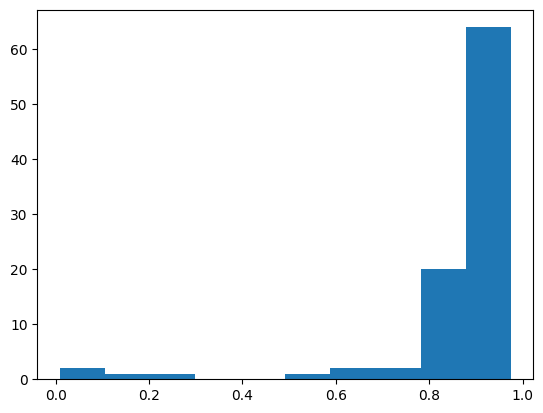

In [222]:
prob_train = cb.predict_proba(Pool(X[prob_train<0.98], cat_features=cat_features))[:,0]
plt.hist(prob_train)

In [229]:
# len(prob_train[prob_train<0.5])/len(prob_train)

# Phase-2 data

In [88]:
from raw_data_processor import RawDataProcessor

In [102]:
raw_df = pd.read_parquet('data/raw_data/phase-2/prob-2/raw_train.parquet')
cate_cols = cat_features

phase2_df = RawDataProcessor.apply_category_features(
    raw_df=raw_df,
    categorical_cols=cate_cols,
    category_index=model.category_index,
    
)


In [103]:
phase2_df = phase2_df[features]
# phase2_df[phase2_df['feature4'] == 'Normal']

In [104]:
phase2_df = Pool(phase2_df, cat_features=cat_features)
phase2_df
phase2_drift = detect_drift_model.predict(phase2_df)
phase2_drift
(phase2_drift==1).sum()

149

# Draw distribution of similarity score

In [10]:
scores = np.array([0.9814152966404575, 0.9836575875486381, 0.8459143968871595, 0.9816666666666667, 0.8, 0.8233333333333334, 0.8342412451361868, 0.7725, 0.775875486381323, 0.98, 0.7608333333333334, 0.8325, 0.8375, 0.8316666666666667, 0.8375, 0.8319941563184806, 0.9852140077821012, 0.9828793774319066, 0.9766666666666667, 0.7543726235741445, 0.7241666666666666, 0.7891666666666667, 0.9758333333333333, 0.7925, 0.8521400778210116, 0.864591439688716, 0.9841666666666666, 0.9642585551330799, 0.7832699619771863, 0.9825095057034221, 0.9828793774319066, 0.84, 0.9859922178988327, 0.9787072243346008, 0.7011406844106464, 0.9863117870722433, 0.8333333333333334, 0.9841666666666666, 0.8283333333333334, 0.98, 0.785, 0.8334600760456273, 0.847148288973384, 0.9726235741444867, 0.7531468531468531, 0.825, 0.6516666666666666, 0.8513618677042801, 0.9883333333333333, 0.8325, 0.8041666666666667, 0.8308333333333333, 0.7416666666666667, 0.7425, 0.7516666666666667, 0.8404669260700389, 0.7141666666666666, 0.9866666666666667, 0.8186770428015564, 0.9908333333333333, 0.9808333333333333, 0.7275, 0.9779467680608365, 0.9891050583657588, 0.8521400778210116, 0.8404669260700389, 0.8544747081712062, 0.7608333333333334, 0.9816666666666667, 0.9783333333333334, 0.980544747081712, 0.7225, 0.7666666666666667, 0.6908333333333333, 0.7422053231939163, 0.8208333333333333, 0.7825, 0.7983333333333333, 0.9808333333333333, 0.9863117870722433, 0.8715953307392996, 0.8475, 0.9841666666666666, 0.985, 0.9875, 0.8291666666666667, 0.8466666666666667, 0.8133333333333334, 0.8016666666666666, 0.7408333333333333])
scores

array([0.9814153 , 0.98365759, 0.8459144 , 0.98166667, 0.8       ,
       0.82333333, 0.83424125, 0.7725    , 0.77587549, 0.98      ,
       0.76083333, 0.8325    , 0.8375    , 0.83166667, 0.8375    ,
       0.83199416, 0.98521401, 0.98287938, 0.97666667, 0.75437262,
       0.72416667, 0.78916667, 0.97583333, 0.7925    , 0.85214008,
       0.86459144, 0.98416667, 0.96425856, 0.78326996, 0.98250951,
       0.98287938, 0.84      , 0.98599222, 0.97870722, 0.70114068,
       0.98631179, 0.83333333, 0.98416667, 0.82833333, 0.98      ,
       0.785     , 0.83346008, 0.84714829, 0.97262357, 0.75314685,
       0.825     , 0.65166667, 0.85136187, 0.98833333, 0.8325    ,
       0.80416667, 0.83083333, 0.74166667, 0.7425    , 0.75166667,
       0.84046693, 0.71416667, 0.98666667, 0.81867704, 0.99083333,
       0.98083333, 0.7275    , 0.97794677, 0.98910506, 0.85214008,
       0.84046693, 0.85447471, 0.76083333, 0.98166667, 0.97833333,
       0.98054475, 0.7225    , 0.76666667, 0.69083333, 0.74220

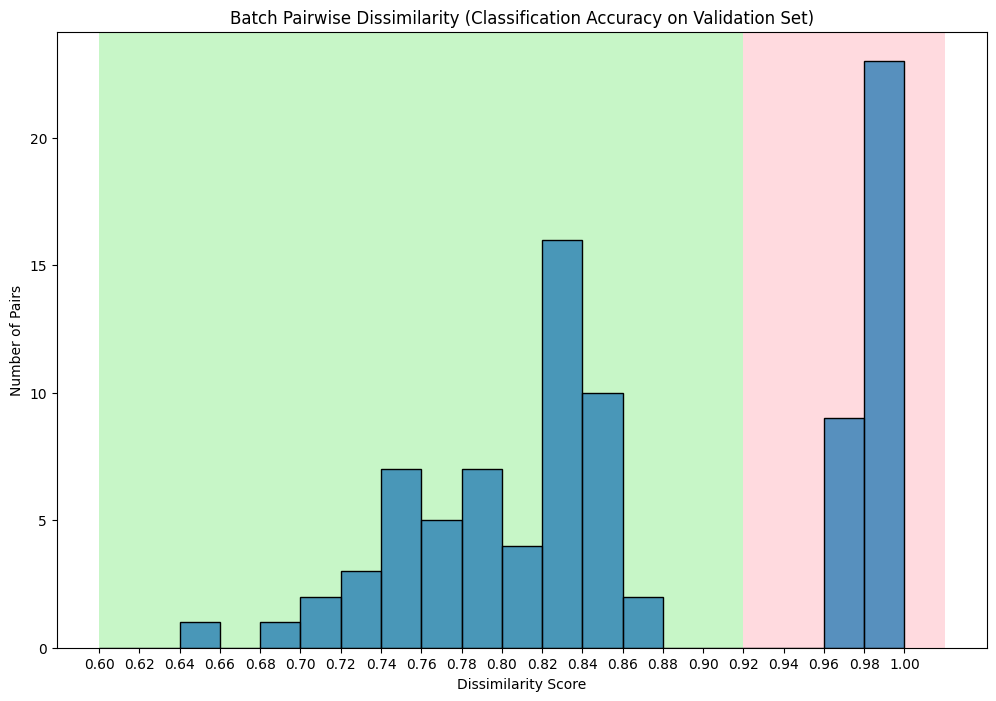

In [50]:
range = np.arange(0.6, 1+0.02, 0.02)
plt.figure(figsize=(12,8))
ax = plt.gca()

plt.axvspan(0.6, 0.92, facecolor='lightgreen', alpha=0.5)
plt.axvspan(0.92, 1.02, facecolor='lightpink', alpha=0.5)


sns.histplot(scores,
             bins=range
            )
ax.set_xticks(range)



plt.xlabel("Dissimilarity Score")
plt.ylabel("Number of Pairs")

plt.title("Batch Pairwise Dissimilarity (Classification Accuracy on Validation Set)")

plt.savefig('report/batch_pairwise_dissimilarity.png')
plt.show()
